In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ROOT import TFile, TChain, TTree, TCanvas
from PMTAnalysisTools import PMT, Ophit, Flash, Event

Welcome to JupyROOT 6.22/08


In [2]:
mj_filepath = "/pnfs/icarus/scratch/users/ascarpel/trigger/6105/ana/" #for majority trigger
mb_filepath = "/pnfs/icarus/scratch/users/ascarpel/trigger/6031/ana/" #for minbias

mj_geotree                = TChain("flashana/geotree")
mj_eventstree             = TChain("flashana/eventstree")
mj_opflashCryoE_flashtree = TChain("flashana/opflashCryoE_flashtree/")
mj_opflashCryoE_ophittree = TChain("flashana/opflashCryoE_ophittree")
mj_opflashCryoW_flashtree = TChain("flashana/opflashCryoW_flashtree")
mj_opflashCryoW_ophittree = TChain("flashana/opflashCryoW_ophittree")

mb_geotree                = TChain("flashana/geotree")
mb_eventstree             = TChain("flashana/eventstree")
mb_opflashCryoE_flashtree = TChain("flashana/opflashCryoE_flashtree")
mb_opflashCryoE_ophittree = TChain("flashana/opflashCryoE_ophittree")
mb_opflashCryoW_flashtree = TChain("flashana/opflashCryoW_flashtree")
mb_opflashCryoW_ophittree = TChain("flashana/opflashCryoW_ophittree")

mj_filenames = []
with open(mj_filepath+"filesana.list") as f:
    mj_filenames  = f.readlines()
mj_filenames = [x.strip() for x in mj_filenames] 

mb_filenames = []
with open(mb_filepath+"filesana.list") as f:
    mb_filenames = f.readlines()

for mj_filename in mj_filenames:
    mj_geotree.Add(mj_filename)
    mj_eventstree.Add(mj_filename)
    mj_opflashCryoE_flashtree.Add(mj_filename)
    mj_opflashCryoE_ophittree.Add(mj_filename)
    mj_opflashCryoW_flashtree.Add(mj_filename)
    mj_opflashCryoW_ophittree.Add(mj_filename)
    break # for testing purposes

for mb_filename in mb_filenames:
    mb_geotree.Add(mj_filename)
    mb_eventstree.Add(mj_filename)
    mb_opflashCryoE_flashtree.Add(mj_filename)
    mb_opflashCryoE_ophittree.Add(mj_filename)
    mb_opflashCryoW_flashtree.Add(mj_filename)
    mb_opflashCryoW_ophittree.Add(mj_filename)
    break # for testing purposes


In [14]:
mb_pmts    = {}
mb_events  = {}

for record in mb_geotree:
    for channel in range(len(record.pmt_x)):
        mb_pmts[channel] = PMT((record.pmt_x[channel],
                                record.pmt_y[channel],
                                record.pmt_z[channel]))

for event in mb_eventstree:
    mb_events[event.event]=Event([event.run,
                                  event.event,
                                  event.timestamp,
                                  event.nflashes,
                                  event.nophits,
                                  event.beam_gate_start,
                                  event.beam_gate_width,
                                  event.beam_type])
    
for flash in mb_opflashCryoE_flashtree:
    _flash = Flash([flash.run,
                    flash.event,
                    flash.timestamp,
                    flash.flash_id,
                    flash.multiplicity,
                    flash.multiplicity_right,
                    flash.multiplicity_left,
                    flash.sum_pe,
                    flash.sum_pe_right,
                    flash.sum_pe_left,
                    flash.flash_time,
                    flash.flash_y,
                    flash.flash_width_y,
                    flash.flash_z,
                    flash.flash_width_z])
    mb_events[flash.event].AddFlash(_flash)


for flash in mb_opflashCryoW_flashtree:
    _flash = Flash([flash.run,
                    flash.event,
                    flash.timestamp,
                    flash.flash_id,
                    flash.multiplicity,
                    flash.multiplicity_right,
                    flash.multiplicity_left,
                    flash.sum_pe,
                    flash.sum_pe_right,
                    flash.sum_pe_left,
                    flash.flash_time,
                    flash.flash_y,
                    flash.flash_width_y,
                    flash.flash_z,
                    flash.flash_width_z])
    mb_events[flash.event].AddFlash(_flash)
    
for ophit in mb_opflashCryoE_ophittree:
    
    _ophit = Ophit([ophit.run,
                    ophit.event,
                    ophit.timestamp,
                    ophit.flash_id,
                    ophit.channel_id,
                    ophit.integral,
                    ophit.amplitude,
                    ophit.start_time,
                    ophit.abs_start_time,
                    ophit.pe,
                    ophit.width,
                    ophit.fast_to_total])
    
    #print(ophit.event)
    #((mb_events[_ophit.event]).GetFlashes())[ophit.flash_id] = _ophit
    
    #print(_ophit.event)
    (((mb_events[_ophit.event]).GetFlashes())[_ophit.flash_id]).AddOpHit(_ophit)

for ophit in mb_opflashCryoW_ophittree:
    
    _ophit = Ophit([ophit.run,
                    ophit.event,
                    ophit.timestamp,
                    ophit.flash_id,
                    ophit.channel_id,
                    ophit.integral,
                    ophit.amplitude,
                    ophit.start_time,
                    ophit.abs_start_time,
                    ophit.pe,
                    ophit.width,
                    ophit.fast_to_total])
    (((mb_events[_ophit.event]).GetFlashes())[_ophit.flash_id]).AddOpHit(_ophit)

In [15]:
xavg=[]
for event_number, event in mb_events.items():
    for flash_number, flash in event.GetFlashes().items():
        x = [ophit.GetPosition(mb_pmts)[0] for ophit in flash.GetOpHits()]
        if len(x) != 0:
            xavg.append(sum(x)/len(x))
print(xavg)

[-13.40996778970032, 7.180874894674919, 54.23054922641112, -67.61520727619504, -45.374124254499165, 4.3051287146175605, -19.58653649939112, 2.635169723948984, -0.2081574610928994, -13.897437731046073, 74.18413724660589, 32.26037868795413, 220.47085988601583, 196.85680299646714, 198.58693143545864, 186.25787580774187, 330.28986562809473, 237.2819516475384, 16.71786464518638, 33.2525006662501, 38.55138395653396, 3.1611780246987182, -17.63347050681043, -52.09668759067663, 18.2288929395083, 25.14336321961646, 8.287718431953543, 186.63416577883416, 208.01151077061482, 214.82733381264526, 132.46841901143392, 222.9932051685369, 250.64850207886408, 273.54374544639285, 214.85505214104285, -64.04038226895216, -60.01170374735368, -8.419706565316682, 67.30653764948498, 22.146564642300874, -12.617211448586804, -19.12045106731477, -13.96847849306853, 66.54743773739641, 143.42125964555584, 31.315063250892127, 104.3241297295753, 334.15246557016843, 260.13552225047147, 354.81029579355396, 303.975406993

In [16]:
for pmt_id, pmt in mb_pmts.items():
    print(pmt.x)

-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875


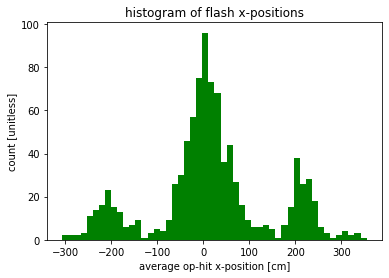

In [23]:
# the histogram of the data
n, bins, patches = plt.hist(xavg, 50, facecolor='g')
plt.ylabel('count [unitless]')
plt.xlabel('average op-hit x-position [cm]')
plt.title('histogram of flash x-positions')
plt.show()